# K-NN

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, 4].values

## Taking care of missing data

In [3]:
"""# Deprecated one
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])"""

"# Deprecated one\n#from sklearn.preprocessing import Imputer\n#imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\nimputer = imputer.fit(X[:, 1:3])\nX[:, 1:3] = imputer.transform(X[:, 1:3])"

## Encoding categorical data

In [4]:
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)"""

'from sklearn.preprocessing import LabelEncoder, OneHotEncoder\nlabelencoder_X = LabelEncoder()\nX[:, 0] = labelencoder_X.fit_transform(X[:, 0])\nonehotencoder = OneHotEncoder(categorical_features=[0])\nX = onehotencoder.fit_transform(X).toarray()\nlabelencoder_y = LabelEncoder()\ny = labelencoder_y.fit_transform(y)'

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [6]:
# The use of scaling depends on the method used in machine learning
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/carlosnewmar/miniconda3/envs/newmar/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting KNN to the Training set

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2,
)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predicting the Test set results

In [25]:
y_pred = classifier.predict(X_test)

## Making the confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
#help(confusion_matrix)

array([[64,  4],
       [ 3, 29]])

## Visualizing the Training set Results

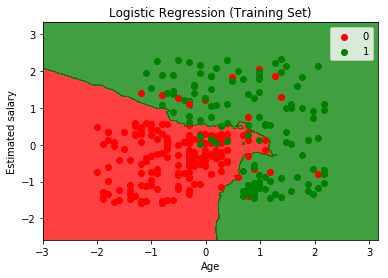

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
    np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01)
)
plt.contourf(
    X1, 
    X2, 
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green')),
)
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set==j, 0], 
        X_set[y_set==j, 1],
        c=ListedColormap(('red', 'green'))(i),
        label=j,
    )
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

## Visualizing the Test set Results

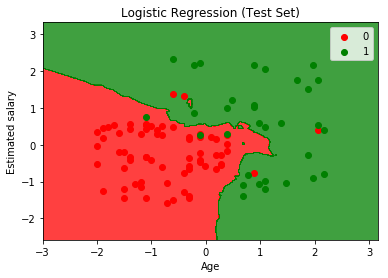

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
    np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01)
)
plt.contourf(
    X1, 
    X2, 
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green')),
)
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set==j, 0], 
        X_set[y_set==j, 1],
        c=ListedColormap(('red', 'green'))(i),
        label=j,
    )
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()